In [2]:
%matplotlib inline

import sys
import matplotlib
import numpy as np
import gym

from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../")

from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [3]:
env = BlackjackEnv()

In [4]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes + 1):
        if i_episode % 1000 == 0:
            print("\n Episode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
            
        episode = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        
        states_in_episode = set([tuple(x[0]) for x in episode])
        for state in states_in_episode:
            first_occurence_idx = next(i for i, x in enumerate(episode) if x[0] == state)
            G = sum([x[2] * (discount_factor ** i) for i, x in enumerate(episode[first_occurence_idx:])])
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]
            
    return V

In [5]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1


 Episode 1000/10000.
 Episode 2000/10000.
 Episode 3000/10000.
 Episode 4000/10000.
 Episode 5000/10000.
 Episode 6000/10000.
 Episode 7000/10000.
 Episode 8000/10000.
 Episode 9000/10000.
 Episode 10000/10000.

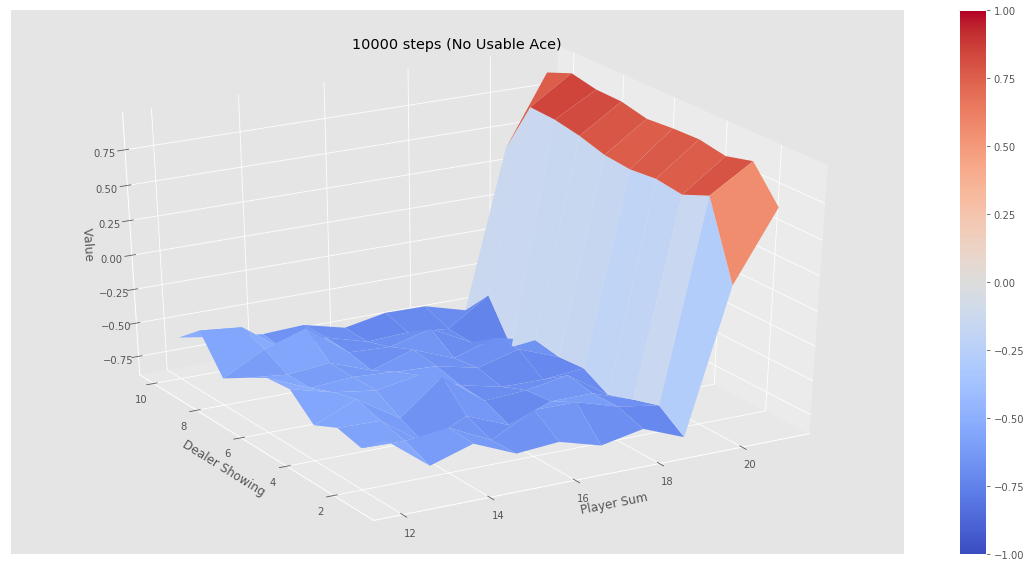

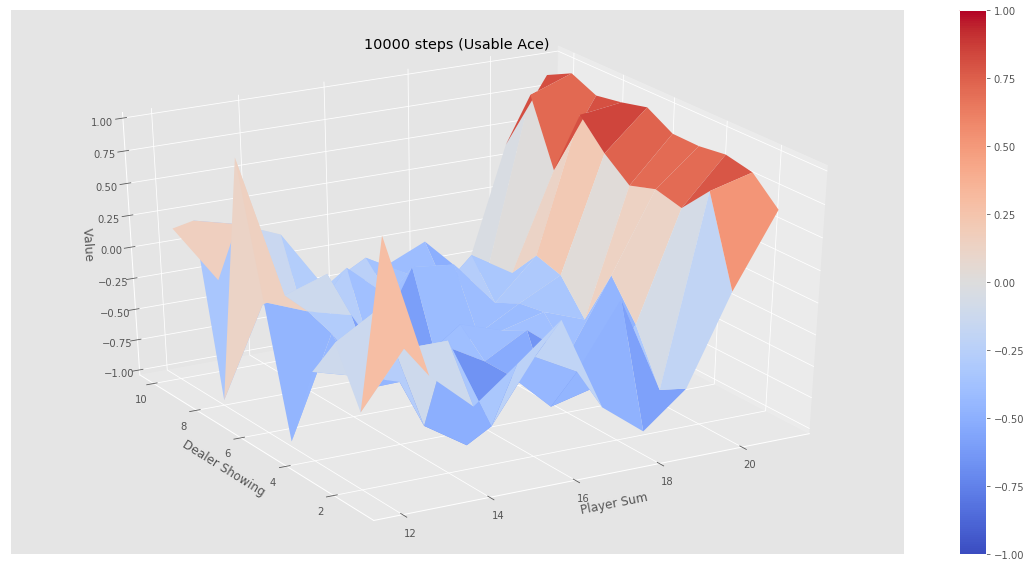


 Episode 1000/500000.
 Episode 2000/500000.
 Episode 3000/500000.
 Episode 4000/500000.
 Episode 5000/500000.
 Episode 6000/500000.
 Episode 7000/500000.
 Episode 8000/500000.
 Episode 9000/500000.
 Episode 10000/500000.
 Episode 11000/500000.
 Episode 12000/500000.
 Episode 13000/500000.
 Episode 14000/500000.
 Episode 15000/500000.
 Episode 16000/500000.
 Episode 17000/500000.
 Episode 18000/500000.
 Episode 19000/500000.
 Episode 20000/500000.
 Episode 21000/500000.
 Episode 22000/500000.
 Episode 23000/500000.
 Episode 24000/500000.
 Episode 25000/500000.
 Episode 26000/500000.
 Episode 27000/500000.
 Episode 28000/500000.
 Episode 29000/500000.
 Episode 30000/500000.
 Episode 31000/500000.
 Episode 32000/500000.
 Episode 33000/500000.
 Episode 34000/500000.
 Episode 35000/500000.
 Episode 36000/500000.
 Episode 37000/500000.
 Episode 38000/500000.
 Episode 39000/500000.
 Episode 40000/500000.
 Episode 41000/500000.
 Episode 42000/500000.
 Episode 43000/500000.
 Episode 44000/5000

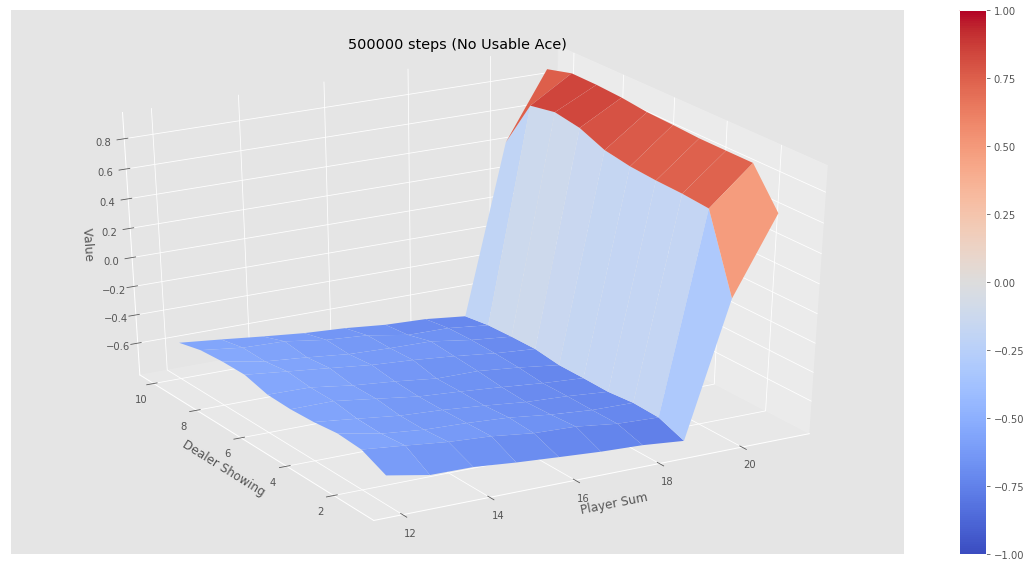

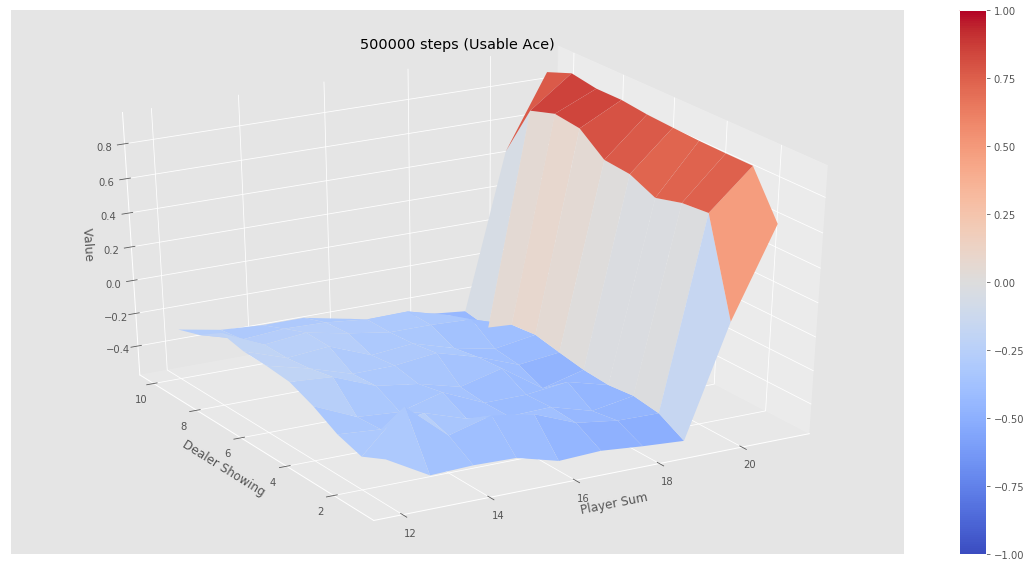

In [6]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10000 steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500000 steps")